In [3]:
import pandas as pd
df = pd.read_csv("/Users/amarissneed/Desktop/NASAProject/wise_nea_comet.csv")
df.head()

,Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class
0,419880 (2011 AH37),01/07/2011,19.7,0.035,0.84,4.26,4.06,9.65,Y,Apollo
1,419624 (2010 SO16),09/17/2010,20.5,0.028,0.93,1.08,1.00,14.52,Y,Apollo
2,414772 (2010 OC103),07/28/2010,19.0,0.333,0.39,2.00,1.31,23.11,N,Apollo
3,414746 (2010 EH20),03/06/2010,18.0,0.268,1.25,3.99,4.24,23.89,N,Amor
4,407324 (2010 OB101),07/18/2010,20.7,0.111,0.77,2.46,2.06,9.12,N,Apollo


In [4]:
print("Rows, Columns:", df.shape)
df.columns

Rows, Columns: (202, 10)


Index(['Designation', 'Discovery Date YYYY-MM-DD', 'H (mag)', 'MOID (AU)',
       'q (AU)', 'Q (AU)', 'period (yr)', 'i (deg)', 'PHA', 'Orbit Class'],
      dtype='object')

In [12]:
dupes = df.columns[df.columns.duplicated()].tolist()
print("Duplicate column names:", dupes)

Duplicate column names: ['q_(au)']


In [13]:
from collections import Counter
counts = Counter()
new_cols= []

for c in df.columns:
    counts[c] += 1
    if counts[c] == 1:
        new_cols.append(c)
    else:
        new_cols.append(f"{c}.{counts[c]-1}")

df.columns = new_cols
df.columns.tolist()[:30]

['designation',
 'discovery_date_yyyy_mm_dd',
 'h_(mag)',
 'moid_(au)',
 'q_(au)',
 'q_(au).1',
 'period_(yr)',
 'i_(deg)',
 'pha',
 'orbit_class']

In [18]:
df.columns = ( 
    pd.Index(df.columns)
    .map(lambda x: str(x).strip().lower())
    .str.replace(" ", "_")
    .str.replace("/", "_")
    .str.replace("-", "_")
)
df.columns.tolist()[:30]

['designation',
 'discovery_date_yyyy_mm_dd',
 'h_(mag)',
 'moid_(au)',
 'q_(au)',
 'q_(au).1',
 'period_(yr)',
 'i_(deg)',
 'pha',
 'orbit_class']

In [9]:
df.columns[df.columns.duplicated()]

Index(['q_(au)'], dtype='object')

In [19]:
object_cols =df.select_dtypes(include="object").columns
for col in object_cols:
    nunq = df[col].nunique(dropna=True)
    if nunq <= 25:
        print(col)
        print("=>")
        print(df[col].dropna().unique())
        print("-" * 50)

pha
=>
['Y' 'N']
--------------------------------------------------
orbit_class
=>
['Apollo' 'Amor' 'Aten' 'Comet' 'Jupiter-family Comet'
 'Halley-type Comet*' 'Parabolic Comet' 'Jupiter-family Comet*'
 'Encke-type Comet']
--------------------------------------------------


In [26]:
candidates = [
    "object_type", "type", "category", "class", "object_class","nea_comet", "object","objecttype"

]
obj_col = None
for c in candidates:
    if c in df.columns:
        obj_col = c
        break
print("Detected object type column:", obj_col)

Detected object type column: None


In [29]:
for c in df.columns:
    print(c)

designation
discovery_date_yyyy_mm_dd
h_(mag)
moid_(au)
q_(au)
q_(au).1
period_(yr)
i_(deg)
pha
orbit_class


In [31]:
object_cols = df.select_dtypes(include="object").columns
for col in object_cols:
    nunq = df[col].nunique(dropna=True)
    if nunq <= 50:
        print(col)
        print("=>")
        print(df[col].dropna().unique()[:50])
        print("-" * 60)

pha
=>
['Y' 'N']
------------------------------------------------------------
orbit_class
=>
['Apollo' 'Amor' 'Aten' 'Comet' 'Jupiter-family Comet'
 'Halley-type Comet*' 'Parabolic Comet' 'Jupiter-family Comet*'
 'Encke-type Comet']
------------------------------------------------------------


In [34]:
df.columns.tolist()

['designation',
 'discovery_date_yyyy_mm_dd',
 'h_(mag)',
 'moid_(au)',
 'q_(au)',
 'q_(au).1',
 'period_(yr)',
 'i_(deg)',
 'pha',
 'orbit_class']

In [35]:
for c in df.columns:
    print(c)

designation
discovery_date_yyyy_mm_dd
h_(mag)
moid_(au)
q_(au)
q_(au).1
period_(yr)
i_(deg)
pha
orbit_class


In [36]:
obj_col = "orbit_class"

In [37]:
df[obj_col].value_counts(dropna=False)

orbit_class
Apollo                   105
Amor                      61
Aten                      15
Comet                      9
Jupiter-family Comet       6
Halley-type Comet*         2
Parabolic Comet            2
Jupiter-family Comet*      1
Encke-type Comet           1
Name: count, dtype: int64

In [38]:
orbit_pct = (
    df[obj_col]
    .value_counts(normalize=True, dropna=False)
    .mul(100)
    .round(2)

)
orbit_pct

orbit_class
Apollo                   51.98
Amor                     30.20
Aten                      7.43
Comet                     4.46
Jupiter-family Comet      2.97
Halley-type Comet*        0.99
Parabolic Comet           0.99
Jupiter-family Comet*     0.50
Encke-type Comet          0.50
Name: proportion, dtype: float64

Matplotlib is building the font cache; this may take a moment.


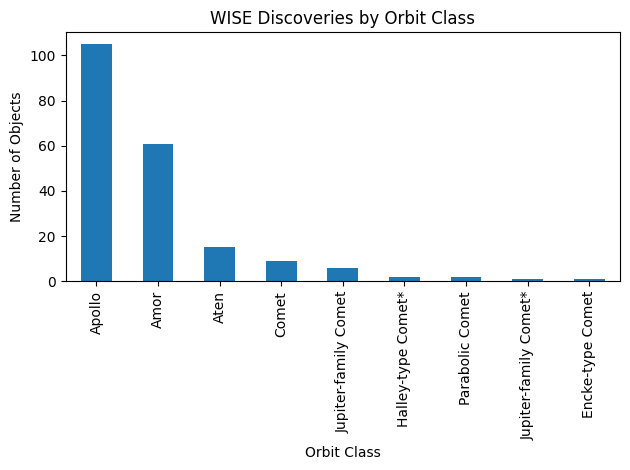

In [39]:
import matplotlib.pyplot as plt
df[obj_col].value_counts().plot(kind="bar")
plt.title("WISE Discoveries by Orbit Class")
plt.xlabel("Orbit Class")
plt.ylabel("Number of Objects")
plt.tight_layout()
plt.show()

In [40]:
nea_comet_df = df[df[obj_col].isin(["NEA", "Comet"])]
nea_comet_df[obj_col].value_counts()

orbit_class
Comet    9
Name: count, dtype: int64

In [42]:
from pathlib import Path
Path("data/cleaned").mkdir(parents=True, exist_ok=True)
df.to_csv("data/cleaned/wise_nea_comet_cleaned.csv", index=False)